In [4]:
import pandas as pd
import glob
import os 

paths = sorted(glob.glob('../data/processed/quarterly/cluster_labels/20*_Q*_clusters.csv'))
el_cluster_history = []

for i, path in enumerate(paths):
    df = pd.read_csv(path)
    filename = os.path.basename(path).replace('.csv', '')

    el_row = df[df['symbol'] == 'EL']

    if not el_row.empty:
        cluster = int(el_row['cluster'].values[0])
        el_cluster_history.append((filename, cluster))

el_cluster_df = pd.DataFrame(el_cluster_history, columns=['Quarter', 'Cluster'])
print(el_cluster_df)

             Quarter  Cluster
0   2021_Q3_clusters        9
1   2021_Q4_clusters        3
2   2022_Q1_clusters       15
3   2022_Q2_clusters        7
4   2022_Q3_clusters        9
5   2022_Q4_clusters        3
6   2023_Q1_clusters        9
7   2023_Q2_clusters       13
8   2023_Q3_clusters       13
9   2023_Q4_clusters       12
10  2024_Q1_clusters        0
11  2024_Q2_clusters       10
12  2024_Q3_clusters       12
13  2024_Q4_clusters        8


In [7]:
import glob

paths = sorted(glob.glob('../data/processed/quarterly/cluster_labels/20*_Q*_clusters.csv'))
el_peers = {}

for path in paths:
    df = pd.read_csv(path)
    quarter = os.path.basename(path).replace('.csv', '').replace('_clusters', '')

    if 'EL' in df['symbol'].values:
        el_cluster = df[df['symbol'] == 'EL']['cluster'].values[0]
        peers = df[df['cluster'] == el_cluster]['symbol'].tolist()
        el_peers[quarter] = peers

# Example: show cluster peers for 2024_Q4
print(f"Peers of EL in 2024_Q4:\n{el_peers['2024_Q4']}")
print(f"Peers of EL in 2024_Q3:\n{el_peers['2024_Q3']}")
print(f"Peers of EL in 2024_Q2:\n{el_peers['2024_Q2']}")
print(f"Peers of EL in 2024_Q1:\n{el_peers['2024_Q1']}")

Peers of EL in 2024_Q4:
['INVH', 'KDP', 'WBD', 'CRL', 'STE', 'DD', 'DOW', 'ATO', 'CE', 'KEYS', 'ARE', 'DLR', 'UDR', 'EQIX', 'HSIC', 'GM', 'ABBV', 'HUM', 'PSX', 'BWA', 'TT', 'PM', 'EL', 'VTRS', 'INTU', 'PNW', 'BEN', 'PARA', 'BALL', 'HAS', 'CAG', 'WBA', 'INTC', 'CI', 'IFF', 'BAX', 'CPB', 'CSX', 'IP', 'OXY', 'PPG']
Peers of EL in 2024_Q3:
['WDAY', 'CRWD', 'PANW', 'AXON', 'PODD', 'FSLR', 'INVH', 'ON', 'NDSN', 'BRO', 'DAY', 'MTCH', 'TECH', 'MRNA', 'CRL', 'PTC', 'TRMB', 'ENPH', 'TSLA', 'TDY', 'TYL', 'DXCM', 'IR', 'STE', 'ZBRA', 'NOW', 'IEX', 'DD', 'WAB', 'ATO', 'TFX', 'CDNS', 'ANSS', 'AMD', 'COO', 'FTV', 'TDG', 'AJG', 'DLR', 'GPN', 'HOLX', 'EXR', 'NWS', 'PYPL', 'O', 'EQIX', 'SWKS', 'MLM', 'AME', 'NWSA', 'PNR', 'XYL', 'FCX', 'FMC', 'VTR', 'WELL', 'CRM', 'IVZ', 'CTRA', 'ISRG', 'ICE', 'AKAM', 'AIZ', 'FIS', 'CME', 'JNPR', 'KIM', 'EL', 'PSA', 'TMO', 'VTRS', 'BIIB', 'PRU', 'ZBH', 'FI', 'SYK', 'A', 'ADI', 'VMC', 'DHR', 'COF', 'EFX', 'SCHW', 'BSX', 'MU', 'IPG', 'LIN', 'GL', 'MMC', 'MDT', 'RVTY', 'NU

In [10]:
import pandas as pd
import glob
import os
from collections import Counter

# Load all cluster-labeled files
paths = sorted(glob.glob('../data/processed/quarterly/cluster_labels/20*_Q*_clusters.csv'))

el_peers = {}
all_peers = []

for path in paths:
    df = pd.read_csv(path)
    quarter = os.path.basename(path).replace('.csv', '').replace('_clusters', '')

    if 'EL' in df['symbol'].values:
        el_cluster = df[df['symbol'] == 'EL']['cluster'].values[0]
        peers = df[df['cluster'] == el_cluster]['symbol'].tolist()
        el_peers[quarter] = peers

        # Add all peers except EL herself
        all_peers += [p for p in peers if p != 'EL']

# Count how many times each stock was a peer of EL
peer_counts = Counter(all_peers)

# Sort and print
print("Stocks most frequently clustered with EL:")
for symbol, count in peer_counts.most_common():
    print(f"{symbol}: {count} times")

# Optional: Show only peers who were clustered with EL at least 4 times
print("\n Peers clustered with EL 4+ times:")
for symbol, count in peer_counts.items():
    if count >= 4:
        print(f"{symbol}: {count}")


Stocks most frequently clustered with EL:
DD: 8 times
IFF: 8 times
TFX: 7 times
NWS: 7 times
EQIX: 7 times
NWSA: 7 times
DXCM: 6 times
PNR: 6 times
FCX: 6 times
BF-B: 6 times
WY: 6 times
ABT: 6 times
PTC: 6 times
IR: 6 times
ZBH: 6 times
ADI: 6 times
VMC: 6 times
BSX: 6 times
RVTY: 6 times
NEM: 6 times
CRM: 6 times
PODD: 5 times
ON: 5 times
NDSN: 5 times
TECH: 5 times
GNRC: 5 times
ENPH: 5 times
IEX: 5 times
KEYS: 5 times
HOLX: 5 times
MLM: 5 times
APH: 5 times
A: 5 times
ROK: 5 times
BAX: 5 times
PFE: 5 times
INVH: 5 times
BRO: 5 times
TRMB: 5 times
TYL: 5 times
WAB: 5 times
HWM: 5 times
AME: 5 times
JNPR: 5 times
BIIB: 5 times
SYK: 5 times
PNW: 5 times
MDT: 5 times
STE: 5 times
COO: 5 times
DLR: 5 times
O: 5 times
SCHW: 5 times
BDX: 5 times
DHR: 5 times
CRL: 5 times
VTRS: 5 times
AXON: 4 times
FDS: 4 times
TSLA: 4 times
FOX: 4 times
FOXA: 4 times
PYPL: 4 times
SWKS: 4 times
AVGO: 4 times
NFLX: 4 times
ISRG: 4 times
AKAM: 4 times
AIZ: 4 times
PSA: 4 times
TMO: 4 times
TXN: 4 times
BEN

In [24]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

el_top_peers = ['DD', 'IFF', 'TFX', 'NWS', 'EQIX', 'NWSA']

# Step 1: Define your metrics and symbols
metrics = [
    'returnOnEquity', 'netProfitMargin',
    'priceEarningsRatio', 'freeCashFlowPerShare',
    'currentRatio', 'quickRatio'
]

symbols_to_track = ['EL'] + el_top_peers

# Step 2: Load cluster-labeled CSVs
paths = sorted(glob.glob('../data/processed/quarterly/cluster_labels/20*_Q*_clusters.csv'))
idx = [os.path.basename(p).replace('.csv', '').replace('_clusters', '') for p in paths]

results = []

for path in paths:
    df = pd.read_csv(path)
    quarter = os.path.basename(path).replace('.csv', '').replace('_clusters', '')

    for symbol in symbols_to_track:
        row = df[df['symbol'] == symbol]
        if not row.empty:
            entry = {'symbol': symbol, 'quarter': quarter}
            for m in metrics:
                entry[m] = row[m].values[0]
            results.append(entry)

# Step 3: Convert to long DataFrame
comparison_df = pd.DataFrame(results)


[*********************100%***********************]  7 of 7 completed


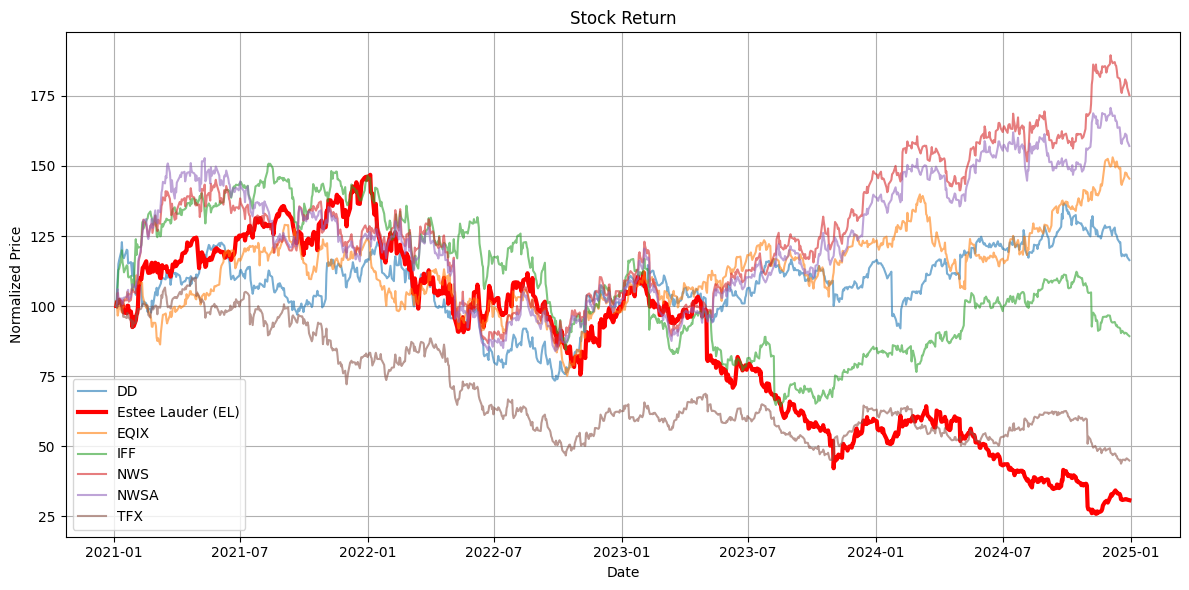

In [56]:
import yfinance as yf
import matplotlib.pyplot as plt

tickers = ['EL', 'DD', 'IFF', 'TFX', 'EQIX', 'NWSA', 'NWS']
data = yf.download(tickers, start='2021-01-01', end='2024-12-31')

# Grab just the 'Close' prices from the MultiIndex
close_prices = data.xs('Close', level=0, axis=1)

# Normalize prices to start at 100
normalized = close_prices / close_prices.iloc[0] * 100

# Plot clean normalized lines
plt.figure(figsize=(12, 6))
for ticker in normalized.columns:
    if ticker == 'EL':
        plt.plot(normalized[ticker], label='Estee Lauder (EL)', linewidth=3, color='red')
    else:
        plt.plot(normalized[ticker], label=ticker, alpha=0.6)

plt.title("Stock Return")
plt.ylabel("Normalized Price")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("el_vs_cluster_peers.png")
plt.show()


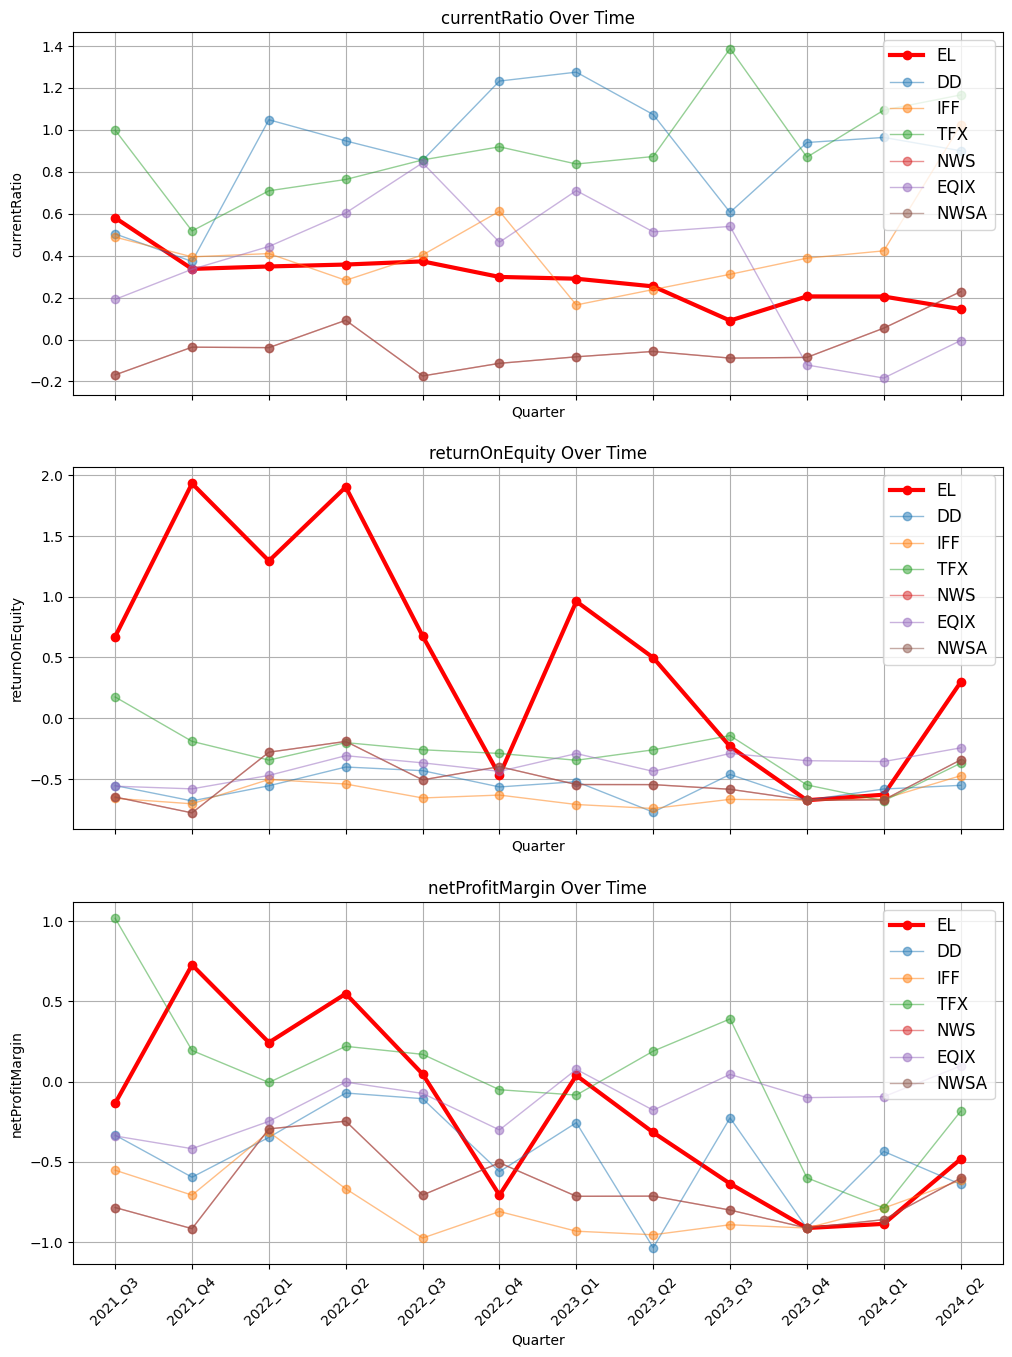

In [68]:
metric = 'netProfitMargin'
# 'returnOnEquity'
# 'netProfitMargin'
# 'priceEarningsRatio'
# 'freeCashFlowPerShare'
# 'currentRatio'
# 'quickRatio'

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(12, 16), sharex=True)
axes = axes.flatten() 

# Step 1: Manually define correct order of quarters
ordered_quarters = [
    '2021_Q3', '2021_Q4',
    '2022_Q1', '2022_Q2', '2022_Q3', '2022_Q4',
    '2023_Q1', '2023_Q2', '2023_Q3', '2023_Q4',
    '2024_Q1', '2024_Q2'
]

metrics = ['currentRatio', 'returnOnEquity', 'netProfitMargin']

for ax, metric in zip(axes, metrics):
    # Map each quarter to a numeric index
    quarter_to_x = {q: i for i, q in enumerate(ordered_quarters)}
    comparison_df_metric = comparison_df[comparison_df['quarter'].isin(ordered_quarters)]
    comparison_df_metric['x'] = comparison_df_metric['quarter'].map(quarter_to_x)

    for symbol in symbols_to_track:
        df_plot = comparison_df_metric[comparison_df_metric['symbol'] == symbol].sort_values('x')

        if symbol == 'EL':
            ax.plot(df_plot['x'], df_plot[metric], marker='o', color='red', linewidth=3, label='EL')
        else:
            ax.plot(df_plot['x'], df_plot[metric], marker='o', linewidth=1, alpha=0.5, label=symbol)

    # Manually label x-axis
    ax.set_xticks(list(quarter_to_x.values()))
    ax.set_xticklabels(list(quarter_to_x.keys()), rotation=45)
    ax.set_title(f"{metric} Over Time")
    ax.set_xlabel("Quarter")
    ax.set_ylabel(metric)
    ax.grid(True)

    ax.legend(loc='upper right', fontsize=12, frameon=True)


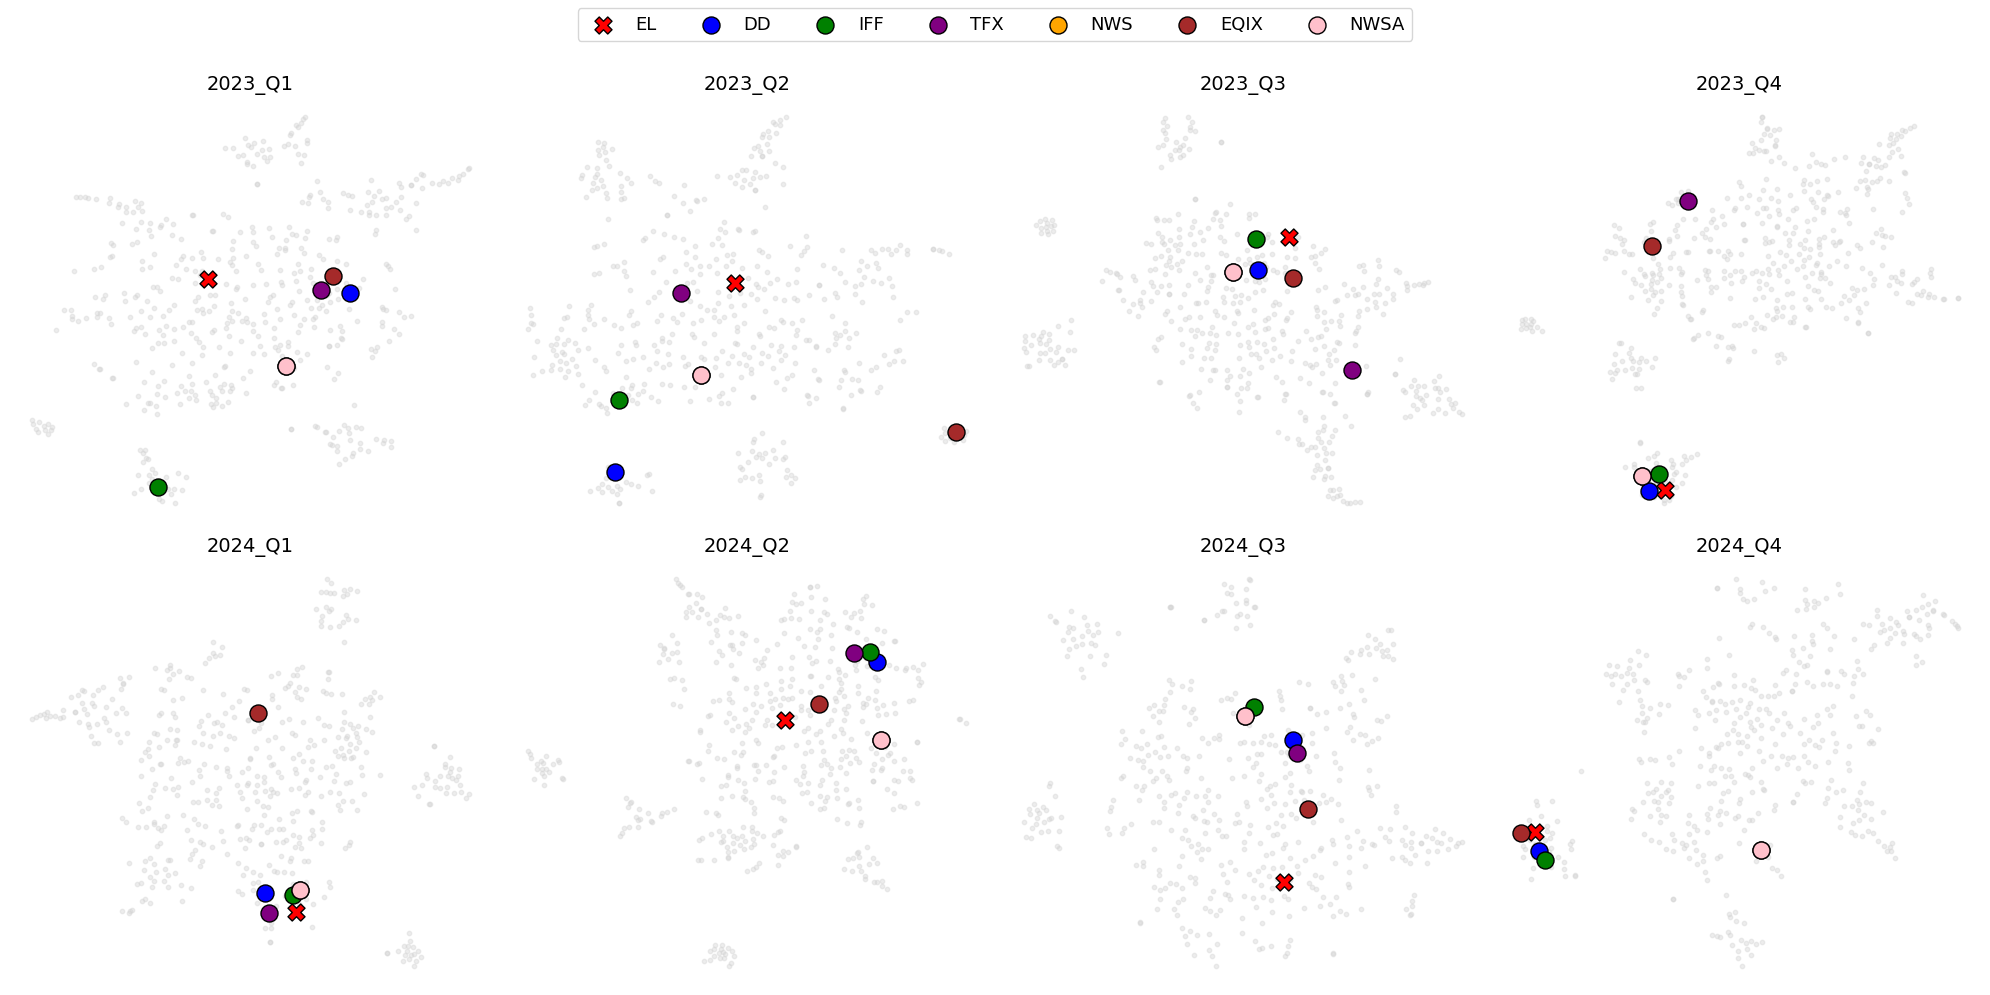

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import glob
import os

# 🔍 EL and top peers to highlight
highlighted = ['EL', 'DD', 'IFF', 'TFX', 'NWS', 'EQIX', 'NWSA']
colors = {
    'EL': 'red',
    'DD': 'blue',
    'IFF': 'green',
    'TFX': 'purple',
    'NWS': 'orange',
    'EQIX': 'brown', 
    'NWSA': 'pink',
}

# Load only 2023 and 2024 cluster files
paths = sorted(glob.glob('../data/processed/quarterly/cluster_labels/20*_Q*_clusters.csv'))
paths = [p for p in paths if '2023' in p or '2024' in p]

# Plot: 2 years × 4 quarters = 8 plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, path in enumerate(paths):
    df = pd.read_csv(path)
    quarter = os.path.basename(path).replace('.csv', '').replace('_clusters', '')

    # Use all features except symbol/calendar/period/cluster
    cols = df.columns[3:-1]

    # Run T-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    tsne_result = tsne.fit_transform(df[cols])

    ax = axes[i]

    # Background: all points faint
    ax.scatter(tsne_result[:, 0], tsne_result[:, 1], c='lightgray', s=10, alpha=0.4)

    # Foreground: EL + Peers
    for symbol in highlighted:
        if symbol in df['symbol'].values:
            idx = df[df['symbol'] == symbol].index[0]
            x, y = tsne_result[idx]
            ax.scatter(
                x, y,
                s=150,
                color=colors[symbol],
                edgecolor='black',
                marker='X' if symbol == 'EL' else 'o',
                label=symbol if i == 0 else None  # Only show legend once
            )

    ax.set_title(quarter, fontsize=14)
    ax.set_facecolor("white")
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)
    ax.axis('off')

# Shared legend on top
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(highlighted), fontsize=13)

# plt.suptitle("Estee Lauder & Peer Movement (T-SNE) — 2023 to 2024", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


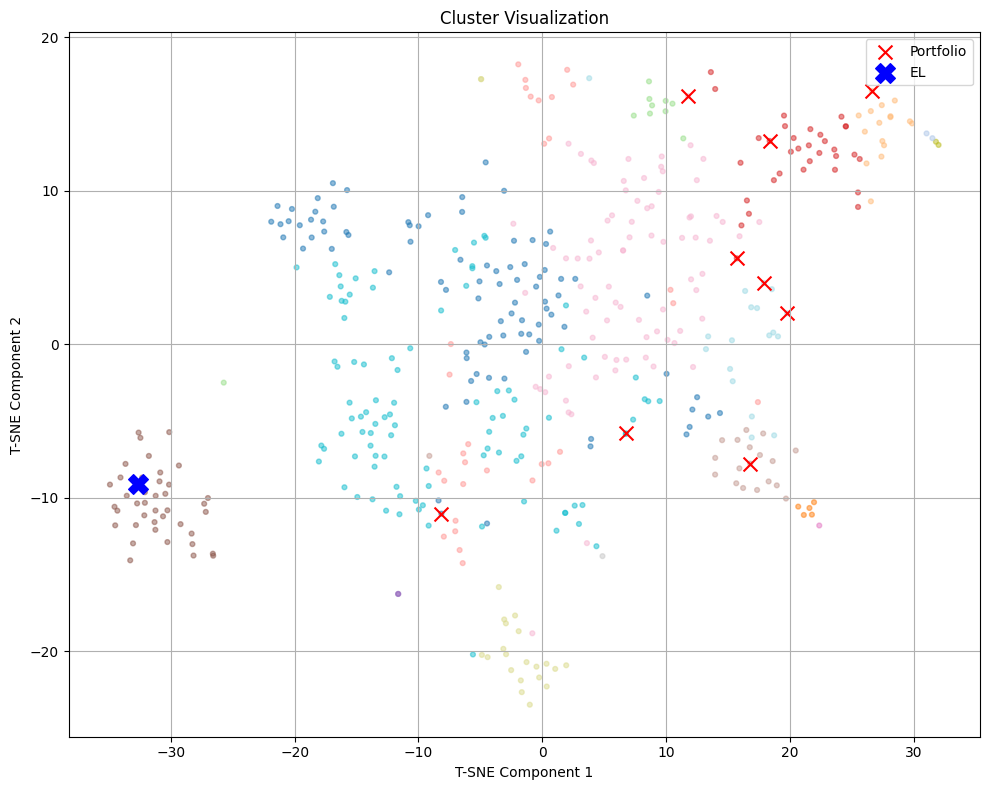

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load cluster-labeled data
df = pd.read_csv('../data/processed/quarterly/cluster_labels/2024_Q4_clusters.csv')

# Set up your portfolio and ticker of interest
portfolio = ["MSFT", "JPM", "META", "NVDA", "LLY", 
             "DBRG", "UNH", "SVNDY", "SNOW", "ESEA", 
             "LGND", "APO", "SE", "URI", "PLTR"]
ticker = 'EL'  

# Define feature columns (exclude symbol, year, etc.)
cols = df.columns[3:-1]  # all features before the 'cluster' column

# Run T-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(df[cols])

# Index mapping for highlights
portfolio_indices = df[df['symbol'].isin(portfolio)].index
ticker_index = df[df['symbol'] == ticker].index

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['cluster'], cmap='tab20', s=12, alpha=0.5)

# Portfolio in red 'x'
plt.scatter(tsne_results[portfolio_indices, 0], tsne_results[portfolio_indices, 1],
            color='red', marker='x', s=100, label='Portfolio')

# Highlighted ticker in blue 'X'
if not ticker_index.empty:
    plt.scatter(tsne_results[ticker_index, 0], tsne_results[ticker_index, 1],
                color='blue', marker='X', s=200, label=ticker)

plt.title('Cluster Visualization')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('tsne_portfolio_highlight.png')
plt.show()


In [49]:
import pandas as pd

# Load the cluster-labeled data
df = pd.read_csv('../data/processed/quarterly/cluster_labels/2024_Q4_clusters.csv')

# Get EL's cluster number
el_cluster = df[df['symbol'] == 'EL']['cluster'].values[0]

# Get all stocks in that cluster (excluding EL itself)
el_peers = df[(df['cluster'] == el_cluster) & (df['symbol'] != 'EL')]['symbol'].tolist()

# Format into printable string
formatted = ', '.join(el_peers)

print("Estee Lauder’s Comps (Same Cluster):")
print("number of stocks in cluster:", len(el_peers))
print(formatted)

Estee Lauder’s Comps (Same Cluster):
number of stocks in cluster: 40
INVH, KDP, WBD, CRL, STE, DD, DOW, ATO, CE, KEYS, ARE, DLR, UDR, EQIX, HSIC, GM, ABBV, HUM, PSX, BWA, TT, PM, VTRS, INTU, PNW, BEN, PARA, BALL, HAS, CAG, WBA, INTC, CI, IFF, BAX, CPB, CSX, IP, OXY, PPG
